<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_apm/blob/main/TB_Mutiple_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Membaca the dataset
dataset = pd.read_csv("credit-card-fix.csv")

In [5]:
#Menampilkan dataset baris awal
dataset.head()

,no_ktp,no_hp,age,pendidikan_terakhir,status_perkawinan,kepemilikan_tempat_tinggal,jenis_kelamin,waktu_kepemilikan_rumah,pendapatan_netto,jumlah_anak_dlm_tanggungan,...,total_mutasi_credit_12,total_mutasi_deb_3,total_mutasi_deb_6,total_mutasi_deb_12,financial_monthly_expense,financial_monthly_nett_income,score,grade,plafond,description
0,3.200000e+15,6.280000e+12,27,SMA,Menikah,MilikKeluarga,F,6/28/2016,11000000,0,...,0,10884000,10884000,0,4500000,8000000,55.1439,6,3700000,APPROVE
1,3.180000e+15,6.280000e+12,31,SMA,Menikah,MilikKeluarga,M,6/28/2016,75000,2,...,223720141,7184460,223685020,223685020,2000000,5500000,29.6065,8,0,REJECT
2,3.520000e+15,6.290000e+12,32,Diploma,JandaDuda,MilikSendiri,F,6/28/2016,10000000,0,...,0,0,0,0,1000000,5650000,20.1649,9,0,REJECT
3,3.670000e+15,6.280000e+12,30,SMA,Menikah,MilikKeluarga,F,6/28/2016,9900000,1,...,0,3323400,5161400,0,4000000,4900000,68.1796,5,4550000,APPROVE
4,1.200000e+15,6.280000e+12,21,SMA,BelumMenikah,MilikKeluarga,M,6/28/2016,5000000,1,...,0,15723500,44045056,0,1500000,4500000,55.5508,6,3700000,APPROVE


In [6]:
#Menetapkan nilai untuk X dan Y
x = dataset[ [ 'grade','plafond']]

y = dataset['score']

In [7]:
#Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [8]:
#instal linear Regresi
!pip install LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [10]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  100.0032440402849
Coefficients:


[('grade', -8.275878957307514), ('plafond', 1.0216876117528028e-06)]

In [11]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [45.18823855 45.18823855 63.27252789 ... 72.11033503 72.11033503
 54.12821446]


In [12]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
27376,43.7551,45.188239
17351,47.2730,45.188239
11470,69.3189,63.272528
30164,34.6248,33.796212
25633,57.3554,54.128214


In [13]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.85
Mean Absolute Error: 2.8411033420749163
Mean Square Error: 13.88408342010081
Root Mean Square Error: 3.726135185430181


Text(0.5, 1.0, 'Actual vs Predicted')

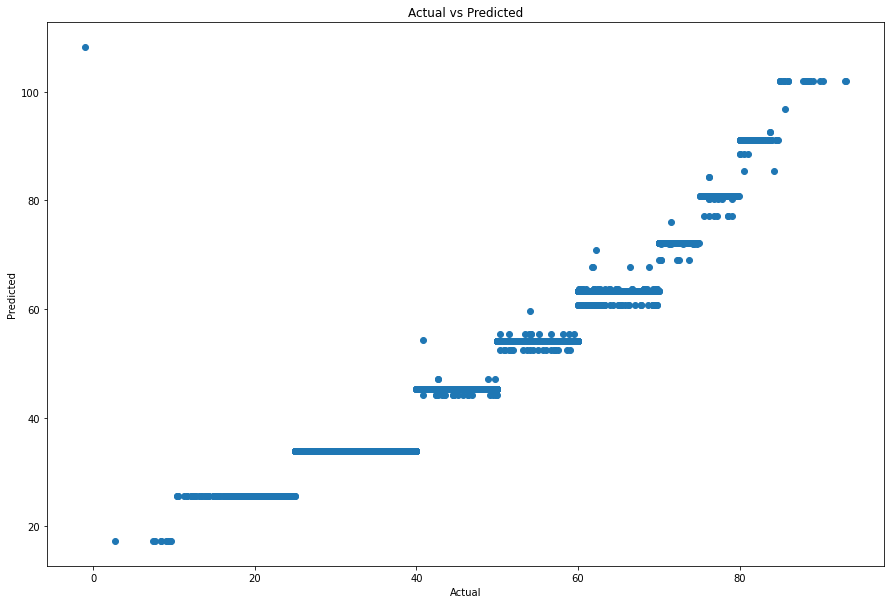

In [14]:
#Grafil
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')